<a href="https://colab.research.google.com/github/DAVIDKSOUSA/DATA-SCIENCE-NA-PR-TICA/blob/master/Data_Science_na_Pr%C3%A1tica_Manipulando_Dados_com_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DataFrames a partir de dicionários e listas



Listas também são estruturas muitos usadas em Python, e não é incomum termos que criar *DataFrames* a partir destas.

Para organizar nossas várias listas de um modo que seja fácil sua conversão em DataFrame, vou usar a função bilt-in zip().

##*DataFrame* a partir de **dicionários**

In [0]:
# importar pandas
import pandas as pd

# criar dicionário
dados = {
    'nome': ['Carlos', 'Pedro', 'Daniela', 'Fernanda'],
    'idade': [35, 32, 15, 49],
    'cidade': ['Araraquara', 'Belém', 'Natal', 'Curitiba'],
    'comprou': [True, False, False, True]}

# criar DataFrame
df = pd.DataFrame(dados)
df

,nome,idade,cidade,comprou
0,Carlos,35,Araraquara,True
1,Pedro,32,Belém,False
2,Daniela,15,Natal,False
3,Fernanda,49,Curitiba,True


##*DataFrame* a partir de listas


In [0]:
# listas
nomes = ['Carlos', 'Pedro', 'Daniela', 'Fernanda']
idades = [35, 32, 15, 49]
cidades = ['Araraquara', 'Belém', 'Natal', 'Curitiba']
compras = [True, False, False, True]

labels = ['nome', 'idade', 'cidade', 'comprou']
list_cols = [nomes, idades, cidades, compras]

# usar função zip
dados = dict(list(zip(labels, list_cols)))

# criar DataFrame
df = pd.DataFrame(dados)
df

,nome,idade,cidade,comprou
0,Carlos,35,Araraquara,True
1,Pedro,32,Belém,False
2,Daniela,15,Natal,False
3,Fernanda,49,Curitiba,True


##Criar novas colunas 

Uma maneira extremamente conveniente de criar novas colunas em um *DataFrame* é usar uma funcionalidade do Pandas conhecida como Broadcasting.

Informando o nome da nova  coluna e declarandio apenas um valor, este é replicado parea todas as linhas do *DataFrame*.

In [0]:
df["saldo"] = 0.0
df

,nome,idade,cidade,comprou,saldo
a,Carlos,35,Araraquara,True,0.0
b,Pedro,32,Belém,False,0.0
c,Daniela,15,Natal,False,0.0
d,Fernanda,49,Curitiba,True,0.0


##Modificar *Index* ou colunas 

In [0]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [0]:
#alterando o index do df

df.index = ["a", "b", "c", "d"]
df


,nome,idade,cidade,comprou,saldo
a,Carlos,35,Araraquara,True,0.0
b,Pedro,32,Belém,False,0.0
c,Daniela,15,Natal,False,0.0
d,Fernanda,49,Curitiba,True,0.0


In [0]:
#É possível alterar o nome das colunas diretamente no atributo da variável:

df.columns = ["Nome do Cliente", "Idade", "Naturalidade", "Fez compras", "Saldo na loja"]
df

,Nome do Cliente,Idade,Naturalidade,Fez compras,Saldo na loja
a,Carlos,35,Araraquara,True,0.0
b,Pedro,32,Belém,False,0.0
c,Daniela,15,Natal,False,0.0
d,Fernanda,49,Curitiba,True,0.0


#Informações Estatísticas



###Resumo das informações estatísticas

Uma das maneiras mais simples de se iniciar uma análise exploratória das variáveis numéricas é utilizando o método describe().
Imediatamente você obtém um resumo contendo algumas das principais informações estatísticas relevantes:
   
*   count - quantidade de entradas válidas
*   mean - média dos valores
*   std - desvio padrão
*   min - menor valor da coluna
*   25% - percentil 25
*   50% - percentil 50 (e mediana)
*   75% - percentil 75
*   max - maior valor da coluna

É possível identificar de cara colunas com valores ausentes e possíveis outliers (por exemplo, olhando o valor da mediana e comparando com valores máximos e mínimos)

In [0]:
#dataset do Prejeto +BIke, que distribui bicicletas em postos estratégicos em Brasília - DF, oferecendo uma 
#solução de transporte que contribui com a mobilidade das pessoas na cidade.

#importando o DataFrame 
import pandas as pd

df = pd.read_csv("http://dl.dropboxusercontent.com/s/yyfeoxqw61o3iel/df_rides.csv")
df

,user_gender,user_birthdate,user_residence,ride_date,time_start,time_end,station_start,station_end,ride_duration,ride_late
0,M,1971-06-08,NaN,2018-01-01,06:05:18,06:21:33,11 - Rodoviária 2,41 - Instituto de Artes,16.250000,0.0
1,M,1989-02-11,DF,2018-01-01,06:27:01,06:32:17,26 - Ministério da Saude,28 - CNMP - Conselho Nacional do Ministério Pú...,5.266667,0.0
2,M,1968-07-19,NaN,2018-01-01,06:29:33,06:44:57,11 - Rodoviária 2,43 - Biblioteca Central,15.400000,0.0
3,M,1991-12-19,NaN,2018-01-01,06:53:53,06:59:45,10 - Ministério dos Transportes,6 - Rodoviária,5.866667,0.0
4,M,1969-03-03,DF,2018-01-01,06:58:56,17:40:04,15 - Brasil 21,11 - Rodoviária 2,641.133333,1.0
...,...,...,...,...,...,...,...,...,...,...
287317,M,1994-01-16,DF,2018-08-31,23:11:42,23:40:20,47 - EQN 410/411,47 - EQN 410/411,28.633333,0.0
287318,M,1990-04-15,NaN,2018-08-31,23:12:02,23:40:10,47 - EQN 410/411,47 - EQN 410/411,28.133333,0.0
287319,M,1976-06-19,DF,2018-08-31,23:15:31,23:18:40,34 - Shopping Mall,22 - 102 Sul,3.150000,0.0
287320,M,1978-01-27,NaN,2018-08-31,23:20:42,23:27:01,24 - Galeria,33 - EQS 104/304,6.316667,0.0


In [0]:
df.describe()

,ride_duration,ride_late
count,214148.000000,214148.000000
mean,29.915932,0.098829
std,58.857297,0.298433
min,3.000000,0.000000
25%,8.083333,0.000000
50%,14.200000,0.000000
75%,33.766667,0.000000
max,999.600000,1.000000


In [0]:
#Média 
df.ride_duration.mean()

29.915931894453134

In [0]:
#Mediana


#OBS: Mediana é o valor que separa a metade maior e a metade menor de um conjunto de dados. 
#Por exemplo, considere o conjunto meus_dados = [1,1,2,4,9].
#O valor que "está no meio" é o número 2. Não confunda com a média, que é a soma de todos os valores dividido pela sua quantidade.

pd.Series([1,1,2,4,9]).median()

2.0

In [0]:
df.ride_duration.std()

58.85729654164017

In [0]:
df.ride_duration.max()

999.6

In [0]:
df.ride_duration.min()

3.0

#Análise Exploratória

In [6]:
#Banco de dados de CENIPA

import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/ocorrencias_aviacao.csv", index_col= "codigo_ocorrencia")
df

,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_tipo_icao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_horario,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_dia_extracao
codigo_ocorrencia,,,,,,,,,,,,,,,,,,,,,
201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,-9.9085,-63.0333,ARIQUEMES,RO,BRASIL,SJOG,2013-05-05,11:00:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL,-11.2644,-61.2589,CACOAL,RO,BRASIL,SSKW,2016-05-13,19:19:00,SIM,ATIVA,IG-084/CENIPA/2016,NÃO,NaN,0,1,NÃO,2018-08-28
201805021421302,INCIDENTE,AERÓDROMO,AERÓDROMO,ADRM,-11.4956,-61.4508,CACOAL,RO,BRASIL,SSKW,2018-03-09,22:40:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
201311259977425,INCIDENTE GRAVE,POUSO SEM TREM,CONTATO ANORMAL COM A PISTA,ARC,-11.4956,-61.4508,CACOAL,RO,BRASIL,SSKW,2013-11-25,12:32:00,NaN,FINALIZADA,IG-209/CENIPA/2013,SIM,2014-04-07,0,1,NÃO,2018-08-28
201103187273112,INCIDENTE,OUTROS,OUTROS,OTHR,-13.1950,-60.8184,CEREJEIRAS,RO,BRASIL,****,2011-03-18,13:30:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200811264169752,INCIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,0.0000,0.0000,NÃO IDENTIFICADA,SP,BRASIL,****,2008-11-26,16:40:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
200910311058203,INCIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,0.0000,0.0000,NÃO IDENTIFICADA,SP,BRASIL,****,2009-10-31,12:10:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
200810318709738,INCIDENTE,POUSO SEM TREM,CONTATO ANORMAL COM A PISTA,ARC,0.0000,0.0000,NÃO IDENTIFICADA,GO,BRASIL,****,2008-10-31,18:00:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28


In [11]:
#Ver resumo do DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5208 entries, 201305055424986 to 201309012098180
Data columns (total 21 columns):
ocorrencia_classificacao          5208 non-null object
ocorrencia_tipo                   5208 non-null object
ocorrencia_tipo_categoria         5208 non-null object
ocorrencia_tipo_icao              5208 non-null object
ocorrencia_latitude               5208 non-null float64
ocorrencia_longitude              5208 non-null float64
ocorrencia_cidade                 5208 non-null object
ocorrencia_uf                     5208 non-null object
ocorrencia_pais                   5208 non-null object
ocorrencia_aerodromo              5208 non-null object
ocorrencia_dia                    5208 non-null object
ocorrencia_horario                5208 non-null object
investigacao_aeronave_liberada    1110 non-null object
investigacao_status               5208 non-null object
divulgacao_relatorio_numero       5208 non-null object
divulgacao_relatorio_publicado    5208 no

In [12]:
#identificar o tipo de cada coluna

df.dtypes

ocorrencia_classificacao           object
ocorrencia_tipo                    object
ocorrencia_tipo_categoria          object
ocorrencia_tipo_icao               object
ocorrencia_latitude               float64
ocorrencia_longitude              float64
ocorrencia_cidade                  object
ocorrencia_uf                      object
ocorrencia_pais                    object
ocorrencia_aerodromo               object
ocorrencia_dia                     object
ocorrencia_horario                 object
investigacao_aeronave_liberada     object
investigacao_status                object
divulgacao_relatorio_numero        object
divulgacao_relatorio_publicado     object
divulgacao_dia_publicacao          object
total_recomendacoes                 int64
total_aeronaves_envolvidas          int64
ocorrencia_saida_pista             object
ocorrencia_dia_extracao            object
dtype: object

In [14]:
#Identificar Valores Únicos 

df.ocorrencia_tipo.unique()

array(['FALHA DO MOTOR EM VOO',
       'COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO', 'AERÓDROMO',
       'POUSO SEM TREM', 'OUTROS', 'PERDA DE CONTROLE NO SOLO',
       'POUSO LONGO', 'TRÁFEGO AÉREO', 'PERDA DE CONTROLE EM VOO',
       'COM TREM DE POUSO', 'INDETERMINADO', 'ESTOURO DE PNEU',
       'VOO CONTROLADO CONTRA O TERRENO', 'EXCURSÃO DE PISTA',
       'POUSO BRUSCO', 'CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO',
       'INCURSÃO EM PISTA', 'VAZAMENTO DE OUTROS FLUIDOS', 'COM ROTOR',
       'FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE ',
       'PERDA DE COMPONENTE EM VOO', 'SOPRO DE REATOR',
       'COM PARA-BRISAS / JANELA / PORTA', 'COM LANÇAMENTO DE CARGA',
       'POUSO ANTES DA PISTA', 'F.O.D.', 'PROBLEMAS FISIOLÓGICOS',
       'DESCOMPRESSÃO NÃO INTENCIONAL / EXPLOSIVA',
       'COLISÃO DE VEÍCULO COM AERONAVE', 'FOGO NO SOLO', 'FOGO EM VOO',
       'CAUSADO POR FENÔMENO METEOROLÓGICO NO SOLO', 'COM PESSOAL EM VOO',
       'COLISÃO DE AERONAVES EM VOO', 'FUM

In [16]:
#Quais valores ocorrem com maior frequencia
df.ocorrencia_tipo.value_counts()

FALHA DO MOTOR EM VOO                                  682
ESTOURO DE PNEU                                        604
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE     574
PERDA DE CONTROLE NO SOLO                              492
OUTROS                                                 350
                                                      ... 
CAUSADO POR RICOCHETE                                    1
CORTANTE DE VENTO / TEMPESTADE                           1
PERDA DA CONSCIÊNCIA                                     1
ALARME FALSO DE FOGO OU DE SUPERAQUECIMENTO              1
MANOBRA ABRUPTA                                          1
Name: ocorrencia_tipo, Length: 63, dtype: int64

In [20]:
#Para saber em porcentagem o número de vezes de cada ocorrencia

#Para dividir pelo número de linhas df.shape[0] e colunas df.shape[1]
df.ocorrencia_tipo.value_counts()/df.shape[0]*100



FALHA DO MOTOR EM VOO                                  13.095238
ESTOURO DE PNEU                                        11.597542
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE     11.021505
PERDA DE CONTROLE NO SOLO                               9.447005
OUTROS                                                  6.720430
                                                         ...    
CAUSADO POR RICOCHETE                                   0.019201
CORTANTE DE VENTO / TEMPESTADE                          0.019201
PERDA DA CONSCIÊNCIA                                    0.019201
ALARME FALSO DE FOGO OU DE SUPERAQUECIMENTO             0.019201
MANOBRA ABRUPTA                                         0.019201
Name: ocorrencia_tipo, Length: 63, dtype: float64

In [21]:
#para saber as que mais ocorrera

(df.ocorrencia_tipo.value_counts()/df.shape[0]*100).head(10)


FALHA DO MOTOR EM VOO                                  13.095238
ESTOURO DE PNEU                                        11.597542
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE     11.021505
PERDA DE CONTROLE NO SOLO                               9.447005
OUTROS                                                  6.720430
PERDA DE CONTROLE EM VOO                                6.624424
COM TREM DE POUSO                                       6.240399
COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO       3.648233
TRÁFEGO AÉREO                                           2.649770
COLISÃO COM OBSTÁCULOS NO SOLO                          2.169739
Name: ocorrencia_tipo, dtype: float64

In [26]:
#Filtrando valores loc tem a capcidade de fazer buscar por labels e condições buleanas.

df.loc[201805021421302,["ocorrencia_latitude", "ocorrencia_longitude"]]

ocorrencia_latitude    -11.4956
ocorrencia_longitude   -61.4508
Name: 201805021421302, dtype: object

In [28]:
df.loc[df.ocorrencia_tipo == "FALHA DO MOTOR EM VOO"].head(3)

,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_tipo_icao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_horario,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_dia_extracao
codigo_ocorrencia,,,,,,,,,,,,,,,,,,,,,
201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,-9.9085,-63.0333,ARIQUEMES,RO,BRASIL,SJOG,2013-05-05,11:00:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
201211159478138,ACIDENTE,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,-16.7588,-49.4405,ABADIA DE GOIÁS,GO,BRASIL,****,2012-11-15,12:40:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
200811167138358,ACIDENTE,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,2.8100,-61.3831,ALTO ALEGRE,RR,BRASIL,****,2008-11-16,12:25:00,NaN,FINALIZADA,A-566/CENIPA/2015,SIM,2016-03-18,3,1,NÃO,2018-08-28


In [30]:
#trabalha com índices numéricos
df.iloc[ :3, :5]

,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_tipo_icao,ocorrencia_latitude
codigo_ocorrencia,,,,,
201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,-9.9085
201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL,-11.2644
201805021421302,INCIDENTE,AERÓDROMO,AERÓDROMO,ADRM,-11.4956


#Valores Ausentes 

In [34]:
#geralmente exclui as linhas de valores ausentes ou substitui por uma média ou mediana.
#Dados do projeto +Bike

import pandas as pd

df = pd.read_csv("http://dl.dropboxusercontent.com/s/yyfeoxqw61o3iel/df_rides.csv")
df.head(10)

,user_gender,user_birthdate,user_residence,ride_date,time_start,time_end,station_start,station_end,ride_duration,ride_late
0,M,1971-06-08,NaN,2018-01-01,06:05:18,06:21:33,11 - Rodoviária 2,41 - Instituto de Artes,16.250000,0.0
1,M,1989-02-11,DF,2018-01-01,06:27:01,06:32:17,26 - Ministério da Saude,28 - CNMP - Conselho Nacional do Ministério Pú...,5.266667,0.0
2,M,1968-07-19,NaN,2018-01-01,06:29:33,06:44:57,11 - Rodoviária 2,43 - Biblioteca Central,15.400000,0.0
3,M,1991-12-19,NaN,2018-01-01,06:53:53,06:59:45,10 - Ministério dos Transportes,6 - Rodoviária,5.866667,0.0
4,M,1969-03-03,DF,2018-01-01,06:58:56,17:40:04,15 - Brasil 21,11 - Rodoviária 2,641.133333,1.0
5,M,1995-11-10,NaN,2018-01-01,07:01:59,07:07:48,26 - Ministério da Saude,11 - Rodoviária 2,5.816667,0.0
6,M,1971-02-21,NaN,2018-01-01,07:02:37,07:22:27,30 - TSE,11 - Rodoviária 2,19.833333,0.0
7,M,1994-11-19,DF,2018-01-01,07:17:34,07:25:05,5 - Setor Hoteleiro Norte,10 - Ministério dos Transportes,7.516667,0.0
8,M,1983-06-14,NaN,2018-01-01,07:21:56,07:30:32,9 - Ministério da Cultura,11 - Rodoviária 2,8.600000,0.0
9,M,1970-06-22,NaN,2018-01-01,07:25:21,07:43:25,4 - Torre de TV,4 - Torre de TV,18.066667,0.0


In [35]:
df.isnull().sum()

user_gender          396
user_birthdate         1
user_residence    179905
ride_date              0
time_start             0
time_end           43285
station_start          0
station_end            0
ride_duration      73174
ride_late          73174
dtype: int64

In [41]:
#ver a porcentagem de valores ausentes 

df.isnull().sum()/df.shape[0]*100

user_gender        0.137824
user_birthdate     0.000348
user_residence    62.614419
ride_date          0.000000
time_start         0.000000
time_end          15.064979
station_start      0.000000
station_end        0.000000
ride_duration     25.467594
ride_late         25.467594
dtype: float64

In [43]:
#Linha
#Eliminar todas as entradas onde exisyeam valores ausentes em "se_gender"

df_row_dropna = df.dropna(subset=["user_gender"], axis=0)

#comparar o antes e o depois

print("Antes:\t{}".format(df.shape))
print("Depois:\t{}".format(df_row_dropna.shape))

Antes:	(287322, 10)
Depois:	(286926, 10)


In [47]:
#COLUNA

df_cols_dropna = df.dropna(axis=1)

print("Antes:\t{}".format(df.shape))
print("Depois:\t{}".format(df_cols_dropna.shape))

ERROR! Session/line number was not unique in database. History logging moved to new session 65
Antes:	(287322, 10)
Depois:	(287322, 4)


In [52]:
#Preencher Valores --- Números 
#Preencher os valore ausentes com a mediana
ride_duration_median = df.ride_duration.median()
df.ride_duration.fillna(ride_duration_median, inplace=True)

#ver valores ausentes
df.ride_duration.isnull().sum()


0

In [53]:
#Preencher valores com Strings
df.user_gender.value_counts()

M    212608
F     74318
Name: user_gender, dtype: int64

In [57]:
df.user_gender.fillna("M",inplace=True)

df.user_gender.isnull().sum()

0

# Lista de Exercícios

A lista de exercícios tem por objetivo colocar a mão na massa e relembrar os conceitos que foram passados nas aulas anteriores.

Optei por não necessariamente seguir a sequencia das aulas, colocando os exercícios 

## Exercício 1

* Importar o pacote Pandas
* importar os dados de ocorrências da aviação civil neste link
* Ver qual o tamanho (linhas x colunas) do *DataFrame*
* Verificar as 5 primeiras 

**Importe o Pandas e importe os dados de ocorrências da aviação civil que se encontram em `csv` [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/ocorrencias_aviacao.csv).**

In [0]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/ocorrencias_aviacao.csv")
df

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_tipo_icao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_horario,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_dia_extracao
0,201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,-9.9085,-63.0333,ARIQUEMES,RO,BRASIL,SJOG,2013-05-05,11:00:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
1,201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL,-11.2644,-61.2589,CACOAL,RO,BRASIL,SSKW,2016-05-13,19:19:00,SIM,ATIVA,IG-084/CENIPA/2016,NÃO,NaN,0,1,NÃO,2018-08-28
2,201805021421302,INCIDENTE,AERÓDROMO,AERÓDROMO,ADRM,-11.4956,-61.4508,CACOAL,RO,BRASIL,SSKW,2018-03-09,22:40:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
3,201311259977425,INCIDENTE GRAVE,POUSO SEM TREM,CONTATO ANORMAL COM A PISTA,ARC,-11.4956,-61.4508,CACOAL,RO,BRASIL,SSKW,2013-11-25,12:32:00,NaN,FINALIZADA,IG-209/CENIPA/2013,SIM,2014-04-07,0,1,NÃO,2018-08-28
4,201103187273112,INCIDENTE,OUTROS,OUTROS,OTHR,-13.1950,-60.8184,CEREJEIRAS,RO,BRASIL,****,2011-03-18,13:30:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5203,200811264169752,INCIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,0.0000,0.0000,NÃO IDENTIFICADA,SP,BRASIL,****,2008-11-26,16:40:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
5204,200910311058203,INCIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,0.0000,0.0000,NÃO IDENTIFICADA,SP,BRASIL,****,2009-10-31,12:10:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
5205,200810318709738,INCIDENTE,POUSO SEM TREM,CONTATO ANORMAL COM A PISTA,ARC,0.0000,0.0000,NÃO IDENTIFICADA,GO,BRASIL,****,2008-10-31,18:00:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
5206,200803063018556,INCIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,0.0000,0.0000,ÁGUAS INTERNACIONAIS,***,BRASIL,****,2008-03-06,07:55:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28


In [0]:
#@title
# importar pandas
import pandas as pd

# importar dados
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/ocorrencias_aviacao.csv")

**Veja qual o tamanho (linhas e colunas) do conjunto de dados importado.**

In [0]:
df.shape

(5208, 22)

In [0]:
df

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_tipo_icao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_horario,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_dia_extracao
0,201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,-9.9085,-63.0333,ARIQUEMES,RO,BRASIL,SJOG,2013-05-05,11:00:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
1,201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL,-11.2644,-61.2589,CACOAL,RO,BRASIL,SSKW,2016-05-13,19:19:00,SIM,ATIVA,IG-084/CENIPA/2016,NÃO,NaN,0,1,NÃO,2018-08-28
2,201805021421302,INCIDENTE,AERÓDROMO,AERÓDROMO,ADRM,-11.4956,-61.4508,CACOAL,RO,BRASIL,SSKW,2018-03-09,22:40:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
3,201311259977425,INCIDENTE GRAVE,POUSO SEM TREM,CONTATO ANORMAL COM A PISTA,ARC,-11.4956,-61.4508,CACOAL,RO,BRASIL,SSKW,2013-11-25,12:32:00,NaN,FINALIZADA,IG-209/CENIPA/2013,SIM,2014-04-07,0,1,NÃO,2018-08-28
4,201103187273112,INCIDENTE,OUTROS,OUTROS,OTHR,-13.1950,-60.8184,CEREJEIRAS,RO,BRASIL,****,2011-03-18,13:30:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5203,200811264169752,INCIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,0.0000,0.0000,NÃO IDENTIFICADA,SP,BRASIL,****,2008-11-26,16:40:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
5204,200910311058203,INCIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,0.0000,0.0000,NÃO IDENTIFICADA,SP,BRASIL,****,2009-10-31,12:10:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
5205,200810318709738,INCIDENTE,POUSO SEM TREM,CONTATO ANORMAL COM A PISTA,ARC,0.0000,0.0000,NÃO IDENTIFICADA,GO,BRASIL,****,2008-10-31,18:00:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
5206,200803063018556,INCIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,0.0000,0.0000,ÁGUAS INTERNACIONAIS,***,BRASIL,****,2008-03-06,07:55:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28


In [0]:
#@title
df.shape

(5208, 22)

**Identifique o tipo de cada coluna (inteiro, float, object).**

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5208 entries, 0 to 5207
Data columns (total 22 columns):
codigo_ocorrencia                 5208 non-null int64
ocorrencia_classificacao          5208 non-null object
ocorrencia_tipo                   5208 non-null object
ocorrencia_tipo_categoria         5208 non-null object
ocorrencia_tipo_icao              5208 non-null object
ocorrencia_latitude               5208 non-null float64
ocorrencia_longitude              5208 non-null float64
ocorrencia_cidade                 5208 non-null object
ocorrencia_uf                     5208 non-null object
ocorrencia_pais                   5208 non-null object
ocorrencia_aerodromo              5208 non-null object
ocorrencia_dia                    5208 non-null object
ocorrencia_horario                5208 non-null object
investigacao_aeronave_liberada    1110 non-null object
investigacao_status               5208 non-null object
divulgacao_relatorio_numero       5208 non-null object
divulgacao_r

In [0]:
df.dtypes

codigo_ocorrencia                   int64
ocorrencia_classificacao           object
ocorrencia_tipo                    object
ocorrencia_tipo_categoria          object
ocorrencia_tipo_icao               object
ocorrencia_latitude               float64
ocorrencia_longitude              float64
ocorrencia_cidade                  object
ocorrencia_uf                      object
ocorrencia_pais                    object
ocorrencia_aerodromo               object
ocorrencia_dia                     object
ocorrencia_horario                 object
investigacao_aeronave_liberada     object
investigacao_status                object
divulgacao_relatorio_numero        object
divulgacao_relatorio_publicado     object
divulgacao_dia_publicacao          object
total_recomendacoes                 int64
total_aeronaves_envolvidas          int64
ocorrencia_saida_pista             object
ocorrencia_dia_extracao            object
dtype: object

In [0]:
#@title
df.dtypes

codigo_ocorrencia                   int64
ocorrencia_classificacao           object
ocorrencia_tipo                    object
ocorrencia_tipo_categoria          object
ocorrencia_tipo_icao               object
ocorrencia_latitude               float64
ocorrencia_longitude              float64
ocorrencia_cidade                  object
ocorrencia_uf                      object
ocorrencia_pais                    object
ocorrencia_aerodromo               object
ocorrencia_dia                     object
ocorrencia_horario                 object
investigacao_aeronave_liberada     object
investigacao_status                object
divulgacao_relatorio_numero        object
divulgacao_relatorio_publicado     object
divulgacao_dia_publicacao          object
total_recomendacoes                 int64
total_aeronaves_envolvidas          int64
ocorrencia_saida_pista             object
ocorrencia_dia_extracao            object
dtype: object

**Veja as 3 primeiras entradas do conjunto de dados.**

In [0]:
df.head(3)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_tipo_icao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_horario,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_dia_extracao
0,201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,-9.9085,-63.0333,ARIQUEMES,RO,BRASIL,SJOG,2013-05-05,11:00:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
1,201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL,-11.2644,-61.2589,CACOAL,RO,BRASIL,SSKW,2016-05-13,19:19:00,SIM,ATIVA,IG-084/CENIPA/2016,NÃO,NaN,0,1,NÃO,2018-08-28
2,201805021421302,INCIDENTE,AERÓDROMO,AERÓDROMO,ADRM,-11.4956,-61.4508,CACOAL,RO,BRASIL,SSKW,2018-03-09,22:40:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28


In [0]:
#@title
df.head(3)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_tipo_icao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_horario,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_dia_extracao
0,201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,-9.9085,-63.0333,ARIQUEMES,RO,BRASIL,SJOG,2013-05-05,11:00:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
1,201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL,-11.2644,-61.2589,CACOAL,RO,BRASIL,SSKW,2016-05-13,19:19:00,SIM,ATIVA,IG-084/CENIPA/2016,NÃO,NaN,0,1,NÃO,2018-08-28
2,201805021421302,INCIDENTE,AERÓDROMO,AERÓDROMO,ADRM,-11.4956,-61.4508,CACOAL,RO,BRASIL,SSKW,2018-03-09,22:40:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28


**Veja quantos valores únicos existem para a coluna `ocorrencia_classificacao`**

In [0]:
df.ocorrencia_classificacao.shape[0] #quantidade de linhas 

5208

In [0]:
df.ocorrencia_classificacao.unique() #quantidade de valores únicos ( quantos valores de cada tipo )

array(['ACIDENTE', 'INCIDENTE GRAVE', 'INCIDENTE'], dtype=object)

In [0]:
#@title
df.ocorrencia_classificacao.unique()

array(['ACIDENTE', 'INCIDENTE GRAVE', 'INCIDENTE'], dtype=object)

**Descubra qual Estado possui o maior número de ocorrências com aeronaves civis.**

In [0]:
df.ocorrencia_uf.unique()

array(['RO', 'RR', 'RS', 'GO', 'AM', 'RJ', 'ES', 'AL', 'SP', 'DF', 'AC',
       'MT', 'PI', 'MS', 'MA', 'AP', 'PA', 'SE', 'TO', 'PR', 'BA', 'CE',
       'MG', 'RN', 'PB', 'SC', 'PE', '***'], dtype=object)

In [0]:
df.ocorrencia_uf.value_counts()

SP     1207
RJ      498
MG      476
PR      437
RS      350
GO      268
PA      255
MT      244
AM      219
BA      208
SC      160
DF      151
MS      132
PE       88
CE       75
ES       66
MA       63
TO       54
AC       53
RR       50
PI       39
RO       30
PB       20
SE       18
AL       16
RN       15
AP       13
***       3
Name: ocorrencia_uf, dtype: int64

In [0]:
#@title
# a resposta é SP, com 1.207 ocorrências
df.ocorrencia_uf.value_counts()

SP     1207
RJ      498
MG      476
PR      437
RS      350
GO      268
PA      255
MT      244
AM      219
BA      208
SC      160
DF      151
MS      132
PE       88
CE       75
ES       66
MA       63
TO       54
AC       53
RR       50
PI       39
RO       30
PB       20
SE       18
AL       16
RN       15
AP       13
***       3
Name: ocorrencia_uf, dtype: int64

**Quantos por cento das ocorrências são do tipo `FALHA DO MOTOR EM VOO`?**

In [0]:
df.ocorrencia_tipo.value_counts()/df.ocorrencia_tipo.shape[0]*100

FALHA DO MOTOR EM VOO                                  13.095238
ESTOURO DE PNEU                                        11.597542
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE     11.021505
PERDA DE CONTROLE NO SOLO                               9.447005
OUTROS                                                  6.720430
                                                         ...    
ALARME FALSO DE FOGO OU DE SUPERAQUECIMENTO             0.019201
PERDA DA CONSCIÊNCIA                                    0.019201
MANOBRA ABRUPTA                                         0.019201
CORTANTE DE VENTO / TEMPESTADE                          0.019201
RELACIONADO COM SECURITY                                0.019201
Name: ocorrencia_tipo, Length: 63, dtype: float64

In [0]:
df.loc[df.ocorrencia_tipo == "FALHA DO MOTOR EM VOO"].shape[0]/df.shape[0]*100

13.095238095238097

In [0]:
#@title
df.loc[df.ocorrencia_tipo == "FALHA DO MOTOR EM VOO"].shape[0] / df.shape[0]

0.13095238095238096

In [0]:
df_cod = pd.read_csv("https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/ocorrencias_aviacao.csv", index_col = "codigo_ocorrencia")
df_cod

,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_tipo_icao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_horario,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_dia_extracao
codigo_ocorrencia,,,,,,,,,,,,,,,,,,,,,
201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,-9.9085,-63.0333,ARIQUEMES,RO,BRASIL,SJOG,2013-05-05,11:00:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL,-11.2644,-61.2589,CACOAL,RO,BRASIL,SSKW,2016-05-13,19:19:00,SIM,ATIVA,IG-084/CENIPA/2016,NÃO,NaN,0,1,NÃO,2018-08-28
201805021421302,INCIDENTE,AERÓDROMO,AERÓDROMO,ADRM,-11.4956,-61.4508,CACOAL,RO,BRASIL,SSKW,2018-03-09,22:40:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
201311259977425,INCIDENTE GRAVE,POUSO SEM TREM,CONTATO ANORMAL COM A PISTA,ARC,-11.4956,-61.4508,CACOAL,RO,BRASIL,SSKW,2013-11-25,12:32:00,NaN,FINALIZADA,IG-209/CENIPA/2013,SIM,2014-04-07,0,1,NÃO,2018-08-28
201103187273112,INCIDENTE,OUTROS,OUTROS,OTHR,-13.1950,-60.8184,CEREJEIRAS,RO,BRASIL,****,2011-03-18,13:30:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200811264169752,INCIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,0.0000,0.0000,NÃO IDENTIFICADA,SP,BRASIL,****,2008-11-26,16:40:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
200910311058203,INCIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,0.0000,0.0000,NÃO IDENTIFICADA,SP,BRASIL,****,2009-10-31,12:10:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
200810318709738,INCIDENTE,POUSO SEM TREM,CONTATO ANORMAL COM A PISTA,ARC,0.0000,0.0000,NÃO IDENTIFICADA,GO,BRASIL,****,2008-10-31,18:00:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28


## Exercício 2

Você irá trabalhar agora com os dados da ação BBAS3, do Banco do Brasil na BOVESPA.

Na variável `df_bbas3`, foi importado [este arquivo `csv`](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/BBAS3.SA.csv), onde o *index* do *DataFrame* representa os valores da ação para determinado dia. Responda as perguntas abaixo.

In [0]:
# importar pandas
import pandas as pd

# importar o csv com dados da BBAS3
df_bbas3 = pd.read_csv("https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/BBAS3.SA.csv",
                       index_col="Date")

**Veja as 5 primeiras entradas da variável `df_bbas3`.**

In [0]:
df_bbas3.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-21,29.730000,30.580000,29.340000,30.580000,28.680056,16301600
2018-09-24,30.379999,30.700001,29.500000,29.730000,27.882866,13086900
2018-09-25,29.030001,29.760000,28.809999,29.549999,27.714045,11742900
2018-09-26,29.650000,29.969999,29.209999,29.450001,27.620264,12842400
2018-09-27,29.680000,30.299999,29.680000,30.290001,28.408072,8767900


In [0]:
#@title
df_bbas3.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-21,29.730000,30.580000,29.340000,30.580000,28.680056,16301600
2018-09-24,30.379999,30.700001,29.500000,29.730000,27.882866,13086900
2018-09-25,29.030001,29.760000,28.809999,29.549999,27.714045,11742900
2018-09-26,29.650000,29.969999,29.209999,29.450001,27.620264,12842400
2018-09-27,29.680000,30.299999,29.680000,30.290001,28.408072,8767900


**Quais são os valores da ação para o dia 04 de outubro de 2018?**

In [0]:
df_bbas3.loc["2018-10-04", ['Adj Close', 'Volume']]

Adj Close    3.293799e+01
Volume       2.792000e+07
Name: 2018-10-04, dtype: float64

In [0]:
#@title
df_bbas3.loc["2018-10-04"]

Open         3.368000e+01
High         3.588000e+01
Low          3.352000e+01
Close        3.512000e+01
Adj Close    3.293799e+01
Volume       2.792000e+07
Name: 2018-10-04, dtype: float64

**Qual a média do Volume financeiro movimentado em todo o período?**

In [0]:
df_bbas3.Volume.mean()

11928526.016260162

In [0]:
#@title
df_bbas3.Volume.mean()

11928526.016260162

## Exercício 3

Você irá trabalhar agora com os dados do projeto +BIKE, usado em aulas passadas.

Na variável df_bike, foi importado [este arquivo csv](http://dl.dropboxusercontent.com/s/yyfeoxqw61o3iel/df_rides.csv).



In [0]:
# importar pandas
import pandas as pd

# importar o csv com dados da BBAS3
df_bike = pd.read_csv("http://dl.dropboxusercontent.com/s/yyfeoxqw61o3iel/df_rides.csv")

# ver as primeiras entradas
df_bike.head()

,user_gender,user_birthdate,user_residence,ride_date,time_start,time_end,station_start,station_end,ride_duration,ride_late
0,M,1971-06-08,NaN,2018-01-01,06:05:18,06:21:33,11 - Rodoviária 2,41 - Instituto de Artes,16.250000,0.0
1,M,1989-02-11,DF,2018-01-01,06:27:01,06:32:17,26 - Ministério da Saude,28 - CNMP - Conselho Nacional do Ministério Pú...,5.266667,0.0
2,M,1968-07-19,NaN,2018-01-01,06:29:33,06:44:57,11 - Rodoviária 2,43 - Biblioteca Central,15.400000,0.0
3,M,1991-12-19,NaN,2018-01-01,06:53:53,06:59:45,10 - Ministério dos Transportes,6 - Rodoviária,5.866667,0.0
4,M,1969-03-03,DF,2018-01-01,06:58:56,17:40:04,15 - Brasil 21,11 - Rodoviária 2,641.133333,1.0


In [0]:
df_bike.isnull().sum()

user_gender          396
user_birthdate         1
user_residence    179905
ride_date              0
time_start             0
time_end           43285
station_start          0
station_end            0
ride_duration      73174
ride_late          73174
dtype: int64

**Qual a porcentagem de valores ausentes para a coluna `user_gender`?**


In [0]:
df_bike.user_gender.isnull().sum()/df_bike.shape[0]*100

0.13782446175371188

In [0]:
#@title
df_bike.user_gender.isnull().sum() / df_bike.shape[0]

0.0013782446175371187

**Preencha a coluna `user_gender` com o valor mais frequente.**

In [0]:
df_bike.user_gender.unique()

array(['M', 'F', nan], dtype=object)

In [0]:
df_bike.user_gender.value_counts()

M    212608
F     74318
Name: user_gender, dtype: int64

In [0]:
df_bike_full = df_bike.dropna(subset= ['user_gender'], axis = 0)
print("Antes:", df_bike.shape[0])
print("Depois:", df_bike_full.shape[0])

Antes: 287322
Depois: 286926


In [0]:
df_bike.fillna('M', inplace = True)
df_bike.user_gender.isnull().sum()

0

In [0]:
#@title
# ver o valor mais frequente
print(df_bike.user_gender.value_counts())

# preencher os valores ausentes de user_gender com 'M'
df_bike.user_gender.fillna('M', inplace=True)

M    213004
F     74318
Name: user_gender, dtype: int64


**Plote um boxplot para a coluna `ride_duration`.**

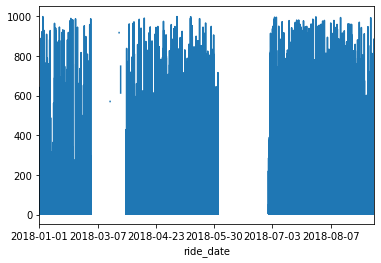

In [0]:

df_bike = pd.read_csv("http://dl.dropboxusercontent.com/s/yyfeoxqw61o3iel/df_rides.csv", index_col= 'ride_date')



df_bike.ride_duration.plot();

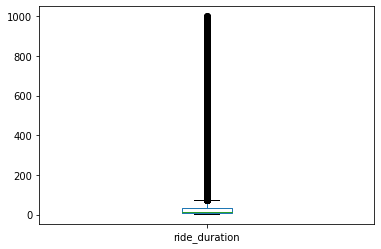

In [0]:
#@title
df_bike.ride_duration.plot(kind="box")